In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [3]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [5]:
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [7]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [8]:
data.head(10)

,in-store,age,items,amount,region
0,0,37,4,281.0300,2
1,0,35,2,219.5100,2
2,1,45,3,1525.7000,4
3,1,46,3,715.2500,3
4,1,33,4,1937.5000,1
5,0,24,3,1314.2000,4
6,0,43,6,8.5472,2
7,1,66,5,819.9800,3
8,1,51,5,908.3100,1
9,1,47,3,767.5400,1


In [9]:
d = data.duplicated()
data.iloc[d.loc[d == True].index]

,in-store,age,items,amount,region
17858,0,76,6,283.61,2
26112,0,67,4,320.41,2
29343,1,23,2,1019.50,4
33834,1,38,3,1993.80,1
34214,1,31,5,1488.10,4
34706,0,39,5,1268.00,4
35971,0,38,7,391.51,2
43958,1,22,1,1303.20,4
44308,1,26,5,1495.70,4
45164,0,79,6,342.28,2


In [118]:
decimals = data.loc[((data.amount*100).apply(np.floor))/100 != data.amount]
decimals

,in-store,age,items,amount,region
0,0,37,4,281.0300,2
6,0,43,6,8.5472,2
12,0,32,2,58.9970,2
29,0,28,7,623.0500,4
37,1,19,7,271.7100,4
...,...,...,...,...,...
79954,1,43,5,644.0500,3
79958,0,50,7,10.0030,2
79975,1,28,3,1152.6000,4
79981,0,38,1,63.8390,2


In [11]:
decimals['items'].value_counts()

6    1361
7    1291
4    1282
2    1274
3    1258
5    1238
8     669
1     639
Name: items, dtype: int64

In [12]:
data['region'].value_counts()

4    26000
2    20000
3    18000
1    16000
Name: region, dtype: int64

In [13]:
decimals.loc[decimals.amount<10].loc[((decimals.amount*1000).apply(np.floor))/1000 != decimals.amount]

,in-store,age,items,amount,region
6,0,43,6,8.5472,2
160,0,61,3,7.8557,2
245,0,38,6,5.4862,2
418,0,56,5,8.5569,2
650,0,84,8,8.4646,2
...,...,...,...,...,...
78658,0,51,3,5.9096,2
78821,0,64,4,7.6409,2
79265,0,72,1,7.5467,2
79905,0,62,2,6.9559,2


In [14]:
decimals.loc[decimals.amount>=10].loc[decimals.amount<100].loc[((decimals.amount*1000).apply(np.floor))/1000 == decimals.amount].loc[decimals['in-store']==1].sort_values('in-store')

,in-store,age,items,amount,region
56,1,36,7,96.541,1
52846,1,32,8,74.193,3
52841,1,39,5,90.285,3
52794,1,43,5,84.837,3
52588,1,62,2,76.079,3
...,...,...,...,...,...
27141,1,38,7,75.256,1
27046,1,50,6,54.054,4
26963,1,60,8,74.817,3
27425,1,25,5,57.773,3


In [15]:
data.loc[data.amount<10].sort_values('in-store')

,in-store,age,items,amount,region
6,0,43,6,8.5472,2
53153,0,60,6,5.2282,2
53236,0,85,3,7.6882,2
53593,0,64,2,7.5802,2
53818,0,46,5,7.2914,2
...,...,...,...,...,...
27904,0,70,5,8.4307,2
28157,0,41,7,7.2660,2
28919,0,51,4,5.9366,2
26980,0,72,4,8.9175,2


In [16]:
data.loc[data.amount>=10].loc[data.amount<100]['in-store'].value_counts()

0    3633
1    1652
Name: in-store, dtype: int64

In [17]:
regions = data.groupby(by='region')

In [18]:
regions.mean()

,in-store,age,items,amount
region,,,,
1,1.000000,43.703938,4.510063,745.161491
2,0.000000,56.610350,4.512750,252.109196
3,0.611056,45.646944,4.494000,917.969637
4,0.500038,38.750731,4.503462,1284.052012


In [19]:
regions.size()

region
1    16000
2    20000
3    18000
4    26000
dtype: int64

In [20]:
regions.sum()

,in-store,age,items,amount
region,,,,
1,16000,699263,72161,1.192258e+07
2,0,1132207,90255,5.042184e+06
3,10999,821645,80892,1.652345e+07
4,13001,1007519,117090,3.338535e+07


In [21]:
regions.get_group(1)['in-store'].value_counts()

1    16000
Name: in-store, dtype: int64

In [22]:
regions.get_group(2)['in-store'].value_counts()

0    20000
Name: in-store, dtype: int64

In [23]:
regions.get_group(3)['in-store'].value_counts()

1    10999
0     7001
Name: in-store, dtype: int64

In [24]:
regions.get_group(4)['in-store'].value_counts()

1    13001
0    12999
Name: in-store, dtype: int64

<AxesSubplot:xlabel='items', ylabel='amount'>

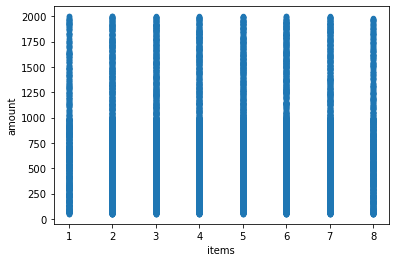

In [25]:
regions.get_group(1).plot.scatter(x='items',y='amount')

<AxesSubplot:xlabel='items', ylabel='amount'>

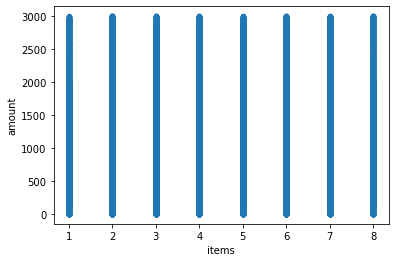

In [26]:
data.plot.scatter(x='items',y='amount')

In [27]:
items = data.groupby('items')

In [28]:
items.size()

items
1     5701
2    11290
3    11487
4    11596
5    11238
6    11522
7    11378
8     5788
dtype: int64

<AxesSubplot:ylabel='Frequency'>

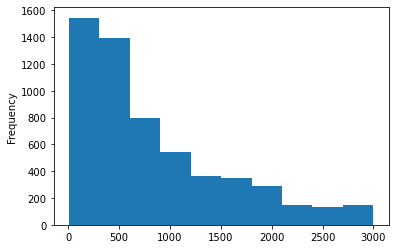

In [29]:
items.get_group(1)['amount'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

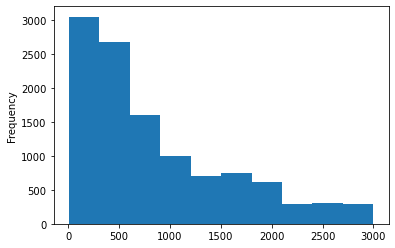

In [30]:
items.get_group(2)['amount'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

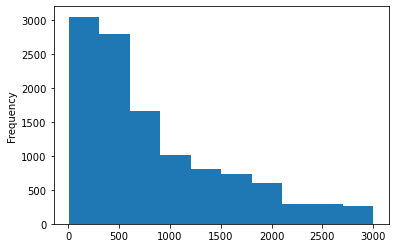

In [31]:
items.get_group(3)['amount'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

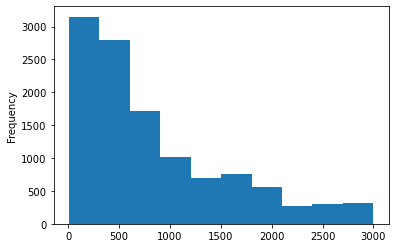

In [32]:
items.get_group(4)['amount'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

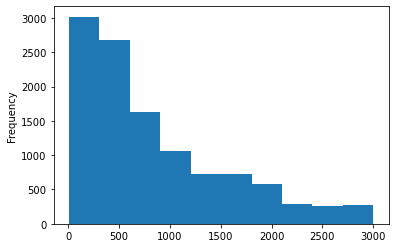

In [33]:
items.get_group(5)['amount'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

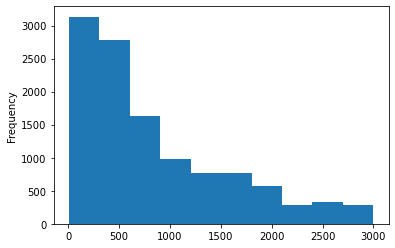

In [34]:
items.get_group(6)['amount'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

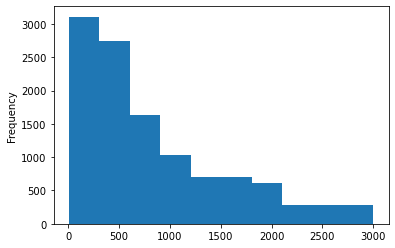

In [35]:
items.get_group(7)['amount'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

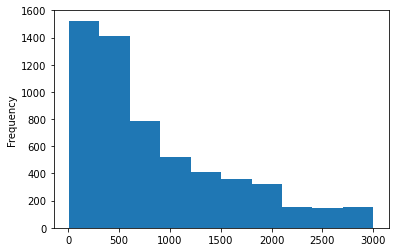

In [36]:
items.get_group(8)['amount'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

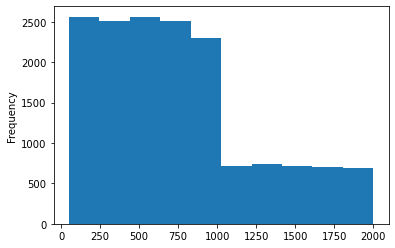

In [37]:
regions.get_group(1)['amount'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

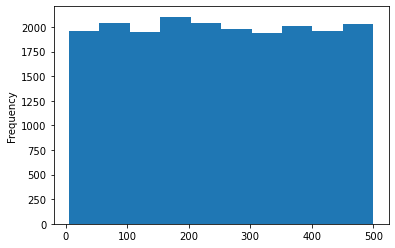

In [38]:
regions.get_group(2)['amount'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

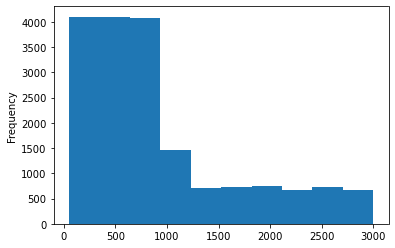

In [39]:
regions.get_group(3)['amount'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

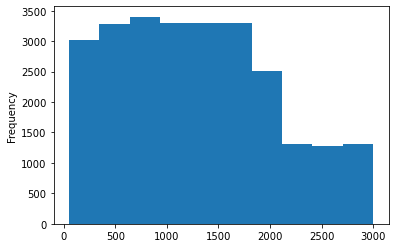

In [40]:
regions.get_group(4)['amount'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

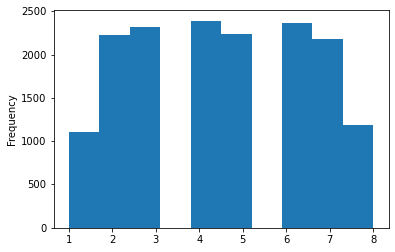

In [41]:
regions.get_group(1)['items'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

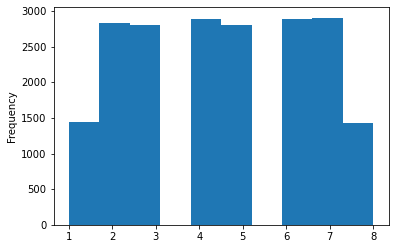

In [42]:
regions.get_group(2)['items'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

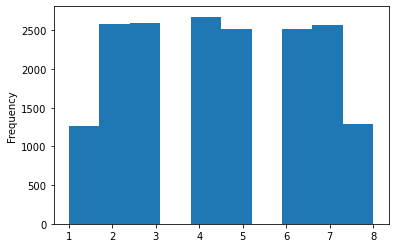

In [43]:
regions.get_group(3)['items'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

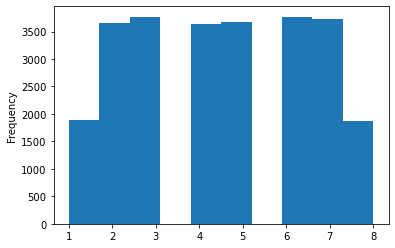

In [44]:
regions.get_group(4)['items'].plot.hist()

In [45]:
u = items.get_group(1).duplicated(subset=['amount']) == False
u.value_counts()

True     5532
False     169
dtype: int64

In [46]:
data.iloc[u[u==True].index]

,in-store,age,items,amount,region
34,1,55,1,120.470,3
38,0,43,1,472.690,2
43,0,44,1,861.210,3
55,1,26,1,1448.600,4
59,0,66,1,65.619,2
...,...,...,...,...,...
79981,0,38,1,63.839,2
79989,0,69,1,404.420,2
79994,0,22,1,698.540,4
79997,0,54,1,414.160,2


In [52]:
avg_per_item=data['amount']/data['items']
avg_per_item = avg_per_item.rename("average")
data2 = data.join(avg_per_item)
data2

,in-store,age,items,amount,region,average
0,0,37,4,281.03,2,70.257500
1,0,35,2,219.51,2,109.755000
2,1,45,3,1525.70,4,508.566667
3,1,46,3,715.25,3,238.416667
4,1,33,4,1937.50,1,484.375000
...,...,...,...,...,...,...
79995,1,71,3,558.82,1,186.273333
79996,0,59,7,1932.00,3,276.000000
79997,0,54,1,414.16,2,414.160000
79998,1,49,4,335.32,1,83.830000


In [48]:
header = data.columns
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


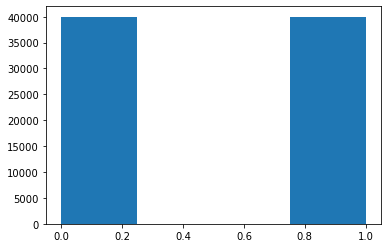

In [49]:
plt.hist(data['in-store'],bins = 4)
plt.show()

<AxesSubplot:ylabel='Frequency'>

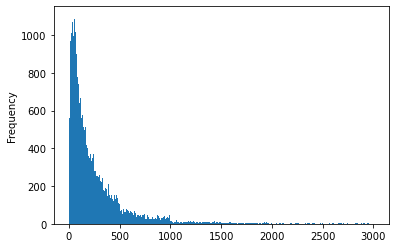

In [78]:
data2.head()
data2['average'].plot.hist(bins=1000)

In [100]:
iq_avg = data2.quantile(.75)['average'] - data2.quantile(.25)['average']
avg_out = data2.loc[(((data2['average'] < data2.quantile(.25)['average']-iq_avg*1.5) | (data2['average'] > data2.quantile(.75)['average']+iq_avg*1.5)))]
print("Outliers in 'average per item':\t",avg_out.size/6)

Outliers in 'average per item':	 6071.0


In [101]:
idx1 = set(data2.set_index(['in-store','age','items', 'amount','region','average']).index)
idx2 = set(avg_out.set_index(['in-store','age','items', 'amount','region','average']).index)

data3 = pd.DataFrame(list(idx1 - idx2), columns=data2.columns)
iq_avg2 = data3.quantile(.75)['average'] - data3.quantile(.25)['average']
avg_out2 = data3.loc[(((data3['average'] < data3.quantile(.25)['average']-iq_avg2*1.5) | (data3['average'] > data3.quantile(.75)['average']+iq_avg2*1.5)) == True)]
print("Outliers in 'average per item':\t",avg_out2['amount'].count())
data3

Outliers in 'average per item':	 2360


,in-store,age,items,amount,region,average
0,1,21,6,1634.600,4,272.433333
1,1,40,4,1915.400,1,478.850000
2,1,28,6,324.760,3,54.126667
3,1,74,7,896.370,1,128.052857
4,0,54,1,56.421,2,56.421000
...,...,...,...,...,...,...
73906,1,22,5,342.590,4,68.518000
73907,1,42,5,1828.500,1,365.700000
73908,1,35,2,934.320,1,467.160000
73909,1,65,1,560.000,1,560.000000


<AxesSubplot:xlabel='items', ylabel='amount'>

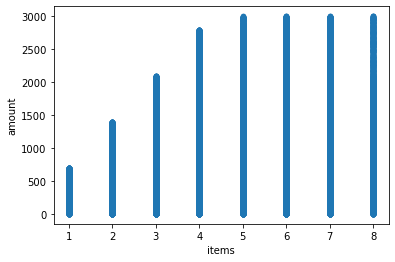

In [102]:
data3.plot.scatter(x='items',y='amount')

In [103]:
data3.corr()

,in-store,age,items,amount,region,average
in-store,1.000000,-0.195759,-0.021395,-0.019191,-0.103529,0.042686
age,-0.195759,1.000000,-0.043566,-0.279709,-0.234299,-0.231665
items,-0.021395,-0.043566,1.000000,0.177373,0.063616,-0.358094
amount,-0.019191,-0.279709,0.177373,1.000000,0.378982,0.760724
region,-0.103529,-0.234299,0.063616,0.378982,1.000000,0.294787
average,0.042686,-0.231665,-0.358094,0.760724,0.294787,1.000000


<AxesSubplot:ylabel='Frequency'>

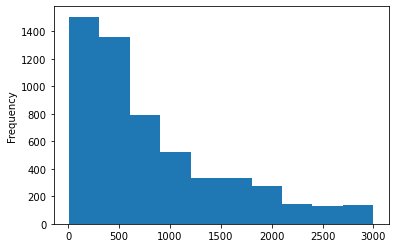

In [83]:
data.groupby('items').get_group(1).drop_duplicates(['amount'])['amount'].plot.hist()

In [89]:
data.groupby('items').get_group(1).drop_duplicates(['amount'])['amount'].max()-data.groupby('items').get_group(1).drop_duplicates(['amount'])['amount'].min()

2993.2957

In [92]:
data.groupby('items').get_group(1).drop_duplicates(['amount'])['amount'].max()

2998.6

In [93]:
data.groupby('items').get_group(1).drop_duplicates(['amount'])['amount'].describe()

count    5532.000000
mean      820.312916
std       713.412374
min         5.304300
25%       282.735000
50%       570.315000
75%      1181.925000
max      2998.600000
Name: amount, dtype: float64

In [104]:
data2.groupby('items').mean()

,in-store,age,amount,region,average
items,,,,,
1,0.501666,45.969479,825.386287,2.690756,825.386287
2,0.496723,45.721878,847.136035,2.680248,423.568018
3,0.504919,45.577871,836.694826,2.680944,278.898275
4,0.501983,45.712401,829.599524,2.652208,207.399881
5,0.504716,45.765083,834.303186,2.679480,166.860637
6,0.503211,45.921107,835.304430,2.665770,139.217405
7,0.488926,45.818773,830.138117,2.688258,118.591160
8,0.497236,45.610055,851.268593,2.666724,106.408574


In [105]:
data2.corr()

,in-store,age,items,amount,region,average
in-store,1.000000,-0.178256,-0.003954,-0.085474,-0.133114,-0.054501
age,-0.178256,1.000000,0.000679,-0.282089,-0.235446,-0.187296
items,-0.003954,0.000679,1.000000,0.000367,-0.001925,-0.469165
amount,-0.085474,-0.282089,0.000367,1.000000,0.403504,0.666855
region,-0.133114,-0.235446,-0.001925,0.403504,1.000000,0.269511
average,-0.054501,-0.187296,-0.469165,0.666855,0.269511,1.000000


<AxesSubplot:xlabel='items', ylabel='average'>

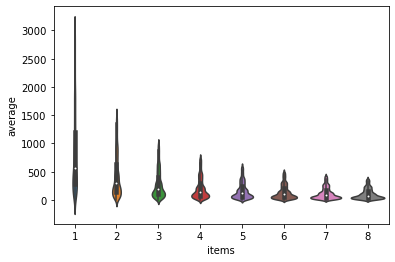

In [115]:

sns.violinplot(x="items", y="average",kind = 'violin',data=data2,size = (300,160))

In [116]:
data.drop(0)

,in-store,age,items,amount,region
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
5,0,24,3,1314.20,4
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [117]:
data

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1
